In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pyedflib
import mne
import seaborn as sns

from pyedflib import highlevel

In [53]:
file = './raw_data/Y572--_C_2024-01-12 - 複製.edf'
signals, signal_headers, header = highlevel.read_edf(file)

c:\Users\88697\AppData\Local\Programs\Python\Python38\lib\site-packages\pyedflib\highlevel.py:355: UserWarning: the filename ./raw_data/Y572--_C_2024-01-12 - 複製.edf contains Unicode, but Windows does not fully support this. Please consider changing your locale to support UTF8. Attempting to load file via workaround (https://github.com/holgern/pyedflib/pull/100) 
  with pyedflib.EdfReader(edf_file) as f:


In [54]:
def get_pos():
    index_saturation = 0
    info_saturation = ''
    index_desaturation = 0
    info_desaturation = ''

    for index, item in enumerate(signal_headers):
        if item['label'] == 'Saturation':
            index_saturation = index
            info_saturation = item
        if item['label'] == 'Desaturation':
            index_desaturation = index
            info_desaturation = item   

    print(index_saturation, info_saturation)
    print(index_desaturation, info_desaturation)
    return index_saturation, info_saturation, index_desaturation, info_desaturation

In [55]:
index_saturation, info_saturation, index_desaturation, info_desaturation = get_pos()
value_saturation = signals[index_saturation]
value_desaturation = signals[index_desaturation]

4 {'label': 'Saturation', 'dimension': 'Saturati', 'sample_rate': 1.0, 'sample_frequency': 1.0, 'physical_max': 110.0, 'physical_min': 70.0, 'digital_max': 110, 'digital_min': 70, 'prefilter': 'No Filter', 'transducer': '165'}
6 {'label': 'Desaturation', 'dimension': 'Ds', 'sample_rate': 10.0, 'sample_frequency': 10.0, 'physical_max': 10.0, 'physical_min': 0.0, 'digital_max': 10, 'digital_min': 0, 'prefilter': 'Event data', 'transducer': '32'}


In [56]:
new_value_desaturation = []
for index in range(len(value_desaturation)):
    if index%10 == 0:
        if value_desaturation[index] != 0.0:
            new_value_desaturation.append(100)
        else:
            new_value_desaturation.append(value_desaturation[index])


if len(new_value_desaturation) == len(value_saturation):
    print('ok')
else:
    print('error')

ok


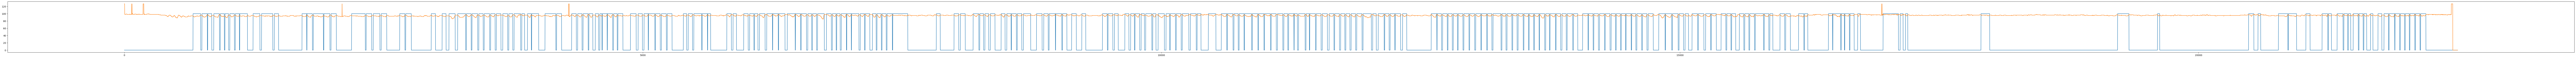

In [57]:
fig = plt.figure(figsize=(200,4))
sns.lineplot(data=new_value_desaturation)
sns.lineplot(data=value_saturation)
plt.show()

In [58]:
# 先記錄desaturation的index
# 以下判斷方式我寫的很白話耶~~
start_point = 0
end_point = 0
max_val = 0
res = 0

# 以 desaturation 為基準
for index, value in enumerate(new_value_desaturation):
    
    # 只有 desaturation 有被標記才會進來判斷
    if value != 0.0:

        if new_value_desaturation[index-1] == 0.0:
            start_point = index
            max_val = value_saturation[start_point]
            print('start_point:', start_point, ' ', value_saturation[start_point])
            print(start_point, max_val)
        if new_value_desaturation[index+1] == 0.0:
            end_point = index
            print('end_point:', end_point, ' ', value_saturation[end_point])
            
        
        if (value_saturation[index+1] > max_val) and ((index+1) != 0.0):
            max_val = value_saturation[index+1]
            print((index+1), max_val)

        # area 抓完後 開始算面積
        
        if end_point > start_point:
            area_res = 0
            for i in range(start_point, end_point):
                area_res = area_res + (max_val - value_saturation[i])
            res += area_res
            print(area_res)
            print('---')
        
why = len(new_value_desaturation)
print('raw data(面積):', res)
print('時間總長(s):', why)
why = why/3600
print('處理過後的值:', res/(120*why))


start_point: 663   94.0
663 94.0
731 95.0
736 96.0
end_point: 736   96.0
224.0
---
start_point: 749   96.0
749 96.0
800 97.0
end_point: 800   97.0
220.0
---
start_point: 805   97.0
805 97.0
end_point: 843   95.0
127.0
---
start_point: 863   95.0
863 95.0
911 96.0
913 97.0
917 98.0
end_point: 917   98.0
302.0
---
start_point: 926   97.0
926 97.0
end_point: 964   94.0
144.0
---
start_point: 971   94.0
971 94.0
1001 95.0
1005 96.0
end_point: 1005   96.0
149.0
---
start_point: 1018   96.0
1018 96.0
end_point: 1061   96.0
124.0
---
start_point: 1071   96.0
1071 96.0
end_point: 1109   95.0
92.0
---
start_point: 1114   95.0
1114 95.0
end_point: 1187   95.0
130.0
---
start_point: 1242   95.0
1242 95.0
end_point: 1307   95.0
148.0
---
start_point: 1324   95.0
1324 95.0
end_point: 1431   95.0
157.0
---
start_point: 1447   95.0
1447 95.0
end_point: 1487   95.0
70.0
---
start_point: 1714   95.0
1714 95.0
1758 96.0
end_point: 1758   96.0
142.0
---
start_point: 1762   96.0
1762 96.0
end_point: 1813 

In [60]:
# import tk
import tkinter as tk
# import ttkbootstrap as ttk

from ttkbootstrap import Style, Button

In [61]:
window = tk.Tk()
window.title('計算面積')
window.geometry('380x400')
# window.resizable(False, False)
window.mainloop()

In [16]:
root = tk.Tk()

style = Style(theme="cosmo")
window = style.master
window.geometry("380x400")
b1 = tk.Button(style="cosmo")
b1.pack(side='left', padx=5, pady=10)



root.mainloop()

TclError: unknown option "-style"